task1 a)

In [ ]:
import pandas as pd
df1 = pd.read_csv('data1.csv', index_col=0)

df2 = pd.read_csv('data2.csv', index_col=1)

print("df1:")
print(df1)
print("\ndf2:")
print(df2)

df1:
   A    B  C
0  1  2.0  3
1  4  5.0  6
4  2  NaN  5

df2:
       A  B  C
2      2  5  6
3  Hello  3  4


b)

In [ ]:
import pandas as pd

df1 = pd.read_csv('data1.csv', index_col=0)
df2 = pd.read_csv('data2.csv', index_col=1)

df3 = pd.concat([df1, df2], axis=0)

print("df3:")
print(df3)

df3:
       A    B  C
0      1  2.0  3
1      4  5.0  6
4      2  NaN  5
2      2  5.0  6
3  Hello  3.0  4


c)

In [ ]:
df4 = pd.read_csv("data3.csv", index_col=0)
print("\ndf4:")
print(df4)

df5 = df3.merge(df4, left_index=True, right_index=True, how="outer")
print("\ndf5:")
print(df5)


df4:
   D  E
1  1  7
4  0  8

df5:
       A    B  C    D    E
0      1  2.0  3  NaN  NaN
1      4  5.0  6  1.0  7.0
2      2  5.0  6  NaN  NaN
3  Hello  3.0  4  NaN  NaN
4      2  NaN  5  0.0  8.0


d)

In [ ]:
import pandas as pd
import numpy as np

df6 = pd.read_json("data.json")
print("\ndf6:")
print(df6)

df7 = pd.concat([df5, df6], ignore_index=True)
print("\ndf7 (concatenation):")
print(df7)


df6:
    A  B
0  11  9
1  22  7
2  33  8

df7 (concatenation):
       A    B    C    D    E
0      1  2.0  3.0  NaN  NaN
1      4  5.0  6.0  1.0  7.0
2      2  5.0  6.0  NaN  NaN
3  Hello  3.0  4.0  NaN  NaN
4      2  NaN  5.0  0.0  8.0
5     11  9.0  NaN  NaN  NaN
6     22  7.0  NaN  NaN  NaN
7     33  8.0  NaN  NaN  NaN


e)

In [ ]:
df7 = df7.map(lambda x: np.nan if isinstance(x, str) else x)
print("\ndf7 (replacing strings with NaN):")
print(df7)


df7 (replacing strings with NaN):
      A    B    C    D    E
0   1.0  2.0  3.0  NaN  NaN
1   4.0  5.0  6.0  1.0  7.0
2   NaN  5.0  6.0  NaN  NaN
3   NaN  3.0  4.0  NaN  NaN
4   2.0  NaN  5.0  0.0  8.0
5  11.0  9.0  NaN  NaN  NaN
6  22.0  7.0  NaN  NaN  NaN
7  33.0  8.0  NaN  NaN  NaN


f)

In [ ]:
df7.fillna(df7.mean(numeric_only=True), inplace=True)
print("\ndf7 (replacing NaN with column means):")
print(df7)

df7.to_csv("newdata.csv", index=False)
print("\nfinal dataframe saved as 'newdata.csv'")


df7 (replacing NaN with column means):
           A         B    C    D    E
0   1.000000  2.000000  3.0  0.5  7.5
1   4.000000  5.000000  6.0  1.0  7.0
2  12.166667  5.000000  6.0  0.5  7.5
3  12.166667  3.000000  4.0  0.5  7.5
4   2.000000  5.571429  5.0  0.0  8.0
5  11.000000  9.000000  4.8  0.5  7.5
6  22.000000  7.000000  4.8  0.5  7.5
7  33.000000  8.000000  4.8  0.5  7.5

final dataframe saved as 'newdata.csv'


task 2

predicting telecom churn...

1. using cross contingency table

international plan    no  yes   All
churn                              
False               2664  186  2850
True                 346  137   483
All                 3010  323  3333

2. using seaborn



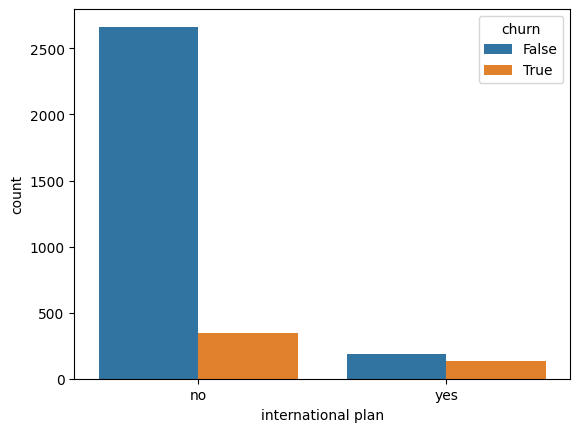

customer service calls    0     1    2    3    4   5   6  7  8  9   All
churn                                                                  
False                   605  1059  672  385   90  26   8  4  1  0  2850
True                     92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333


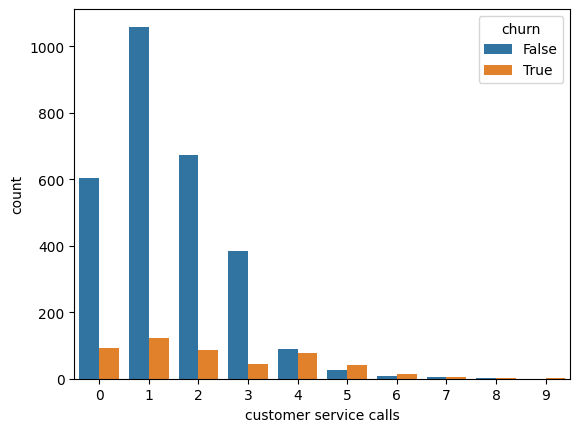

churn               False  True   All
many_service_calls                   
0                    2721   345  3066
1                     129   138   267
All                  2850   483  3333


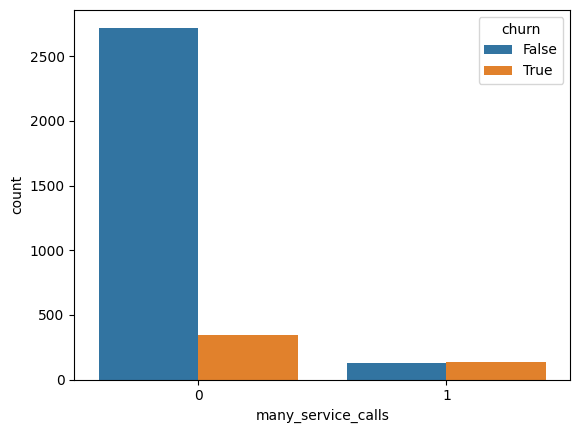

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('telecom_churn.csv', index_col=1)

print("predicting telecom churn...")
print('\n1. using cross contingency table\n')
df2 = pd.crosstab(df1['churn'], df1['international plan'], margins=True)
print(df2)

print('\n2. using seaborn\n')
sns.countplot(x='international plan',hue='churn',data=df1)
plt.show()

df3 = pd.crosstab(df1['churn'], df1['customer service calls'], margins=True)
print(df3)

sns.countplot(x='customer service calls',hue='churn',data=df1)
plt.show()

df1['many_service_calls'] = (df1['customer service calls'] > 3).astype('int')
df4 = pd.crosstab(df1['many_service_calls'], df1['churn'], margins=True)
print(df4)

sns.countplot(x='many_service_calls',hue='churn',data=df1)
plt.show()
